
#  <font color='Blue'>Task # 3 To Explore Unsupervised Machine Learning

### <font color='Blue'>From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_profiling
import os
os.chdir(r"C:\Users\Rahul\Desktop\spark intern\task 3")
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r"C:\Users\Rahul\Desktop\spark intern\task 3\Iris.csv")

# data Inspection

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Profiling using pandas profiling

In [4]:
report = pandas_profiling.ProfileReport(data)

In [5]:
report

In [33]:
# saving file
report.to_file(output_file = 'profilereport_task3.html')

# No missing values in the dataset

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

# visualising the data

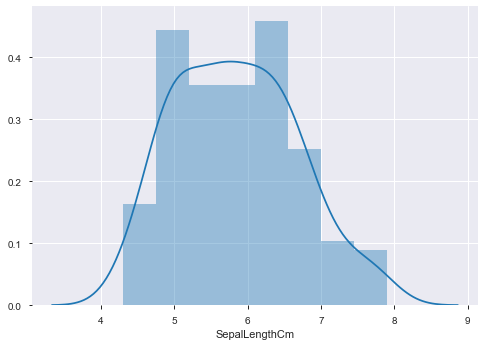

In [9]:
sns.distplot(data.SepalLengthCm)
plt.show()

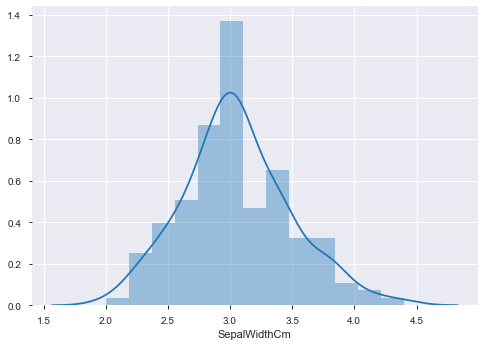

In [10]:
sns.distplot(data.SepalWidthCm)
plt.show()

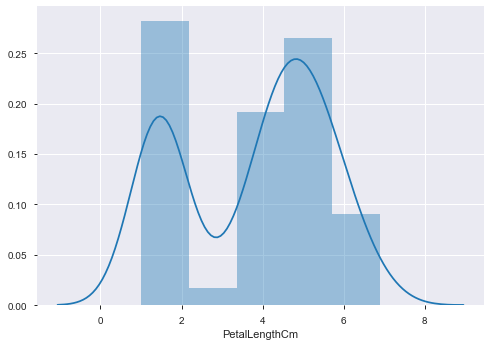

In [11]:
sns.distplot(data.PetalLengthCm)
plt.show()

# Drop columns which are not adding usefull information 

In [12]:
data.drop(["Id"],axis = 1,inplace = True)

# An utility function to create dummy variable


In [13]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [14]:
# for c_feature in categorical_features
for c_feature in ["Species"]:
    data[c_feature] = data[c_feature].astype('category')
    data = create_dummies(data, c_feature)

# visualize correlation matrix in Seaborn using a heatmap


<AxesSubplot:>

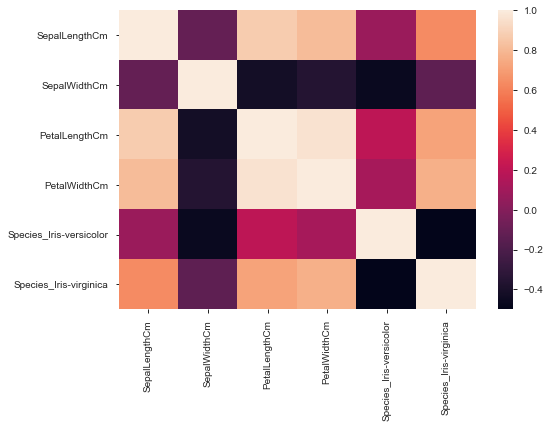

In [15]:
sns.heatmap(data.corr())

## Standardrizing data
To put data on the same scale

In [16]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species_Iris-versicolor', 'Species_Iris-virginica'],
      dtype='object')

In [17]:
sc=StandardScaler()

data_scaled=sc.fit_transform(data)

# Segmentation

In [18]:
km_2=KMeans(n_clusters=2,random_state=123)

In [19]:
km_2.fit(data_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [20]:
km_2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
km_2.cluster_centers_

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862, -0.70710678,
        -0.70710678],
       [ 0.50728948, -0.4211534 ,  0.65243918,  0.62756431,  0.35355339,
         0.35355339]])

In [22]:
km_2=KMeans(n_clusters=2,random_state=123) .fit(data_scaled)
#km_2.label_a

km_3=KMeans(n_clusters=3,random_state=123).fit(data_scaled)
#km_5.labels_a

km_4=KMeans(n_clusters=4,random_state=123).fit(data_scaled)
#km_5.labels_

km_5=KMeans(n_clusters=5,random_state=123).fit(data_scaled)
#km_6.labels_

In [23]:
data['cluster_2'] = km_2.labels_
data['cluster_3'] = km_3.labels_
data['cluster_4'] = km_4.labels_

In [24]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica,cluster_2,cluster_3,cluster_4
0,5.1,3.5,1.4,0.2,0,0,0,1,1
1,4.9,3.0,1.4,0.2,0,0,0,1,1
2,4.7,3.2,1.3,0.2,0,0,0,1,1
3,4.6,3.1,1.5,0.2,0,0,0,1,1
4,5.0,3.6,1.4,0.2,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1,1,0,2
146,6.3,2.5,5.0,1.9,0,1,1,0,3
147,6.5,3.0,5.2,2.0,0,1,1,0,2
148,6.2,3.4,5.4,2.3,0,1,1,0,2


In [25]:
pd.Series(km_2.labels_).value_counts()/sum(pd.Series(km_2.labels_).value_counts())

1    0.666667
0    0.333333
dtype: float64

In [26]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

2    0.333333
1    0.333333
0    0.333333
dtype: float64

In [27]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

1    0.333333
0    0.333333
2    0.200000
3    0.133333
dtype: float64

# Elbow Analysis

In [28]:
cluster_range = range( 2, 10 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( data_scaled )
    cluster_errors.append( clusters.inertia_ )

In [29]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,448.732006
1,3,167.888787
2,4,138.280640
3,5,111.597276
4,6,85.334585
5,7,75.302482
6,8,66.307906
7,9,57.847607


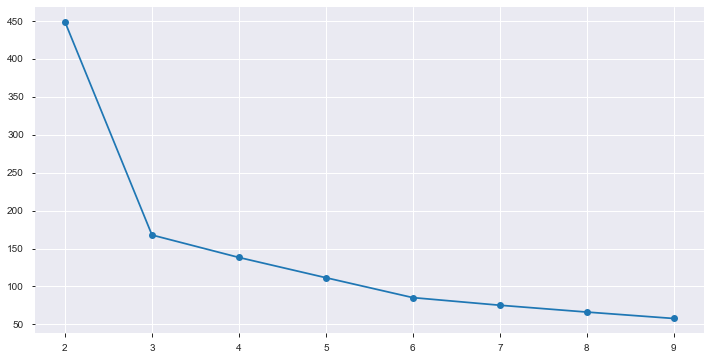

In [30]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 2 and 3. So, optimal number of clusters could either 3. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

# Visualising K means

In [31]:
from sklearn.cluster import KMeans
km_3=KMeans(n_clusters=3,random_state=123)#.fit(data_scaled)
km_3.fit(data_scaled)
y_kmeans = km_3.predict(data_scaled)

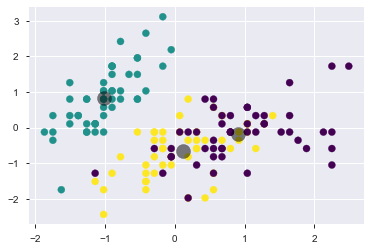

In [32]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = km_3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);